In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor

In [2]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

cumulative_vaccinations = [
    1959151,
    2080280,
    2254556,
    2494371,
    2769164,
    3090058,
    3365492,
    3520056,
    3687206,
    3985579,
    4303730,
    4661293,
    5085771,
    5727693,
    5962544,
    6221850,
    6473752,
    6816945,
    7253305,
    7792996,
    8082355,
    8362868,
    8663041,
    9041835,
    9430261,
    9831897,
    10290215,
    10519729,
    10771998,
    11083652,
    11422507,
    11809241,
    12246166,
    12675663,
    12862909,
    13082669,
    13395338,
    13817914,
    14214176,
    14537978,
    14844087,
    14958074,
    15113158,
    15398055,
    15794992,
    16227104,
    16679881,
    17051245,
    17212804,
    17373384,
    17554700,
    17785702,
    ]

daily_inoculations = [100000]

for i, x in enumerate(cumulative_vaccinations):
    if len(cumulative_vaccinations) > i+1:
        daily_inoculations.append(cumulative_vaccinations[i+1] - x)

# daily_moving_average = moving_average(np.array(daily_inoculations), 7)
dataframe = pd.DataFrame({'date': pd.date_range(start='1/12/2021', end='3/04/2021'), 'daily': daily_inoculations, 'cumulative': cumulative_vaccinations})
dataframe.set_index('date', inplace=True)

# daily_moving_average = moving_average(np.array(daily_inoculations), 7)
# dataframe = pd.DataFrame({'date': pd.date_range(start='1/18/2021', end='2/9/2021'), 'daily': daily_moving_average, 'cumulative': cumulative_vaccinations[6:]})
# dataframe.set_index('date', inplace=True)

In [3]:
from datetime import datetime, timedelta

reg = LinearRegression()

x = np.array([x.timetuple().tm_yday for x in dataframe.index]).reshape(-1, 1)
y = dataframe['daily']

reg.fit(x, y)

LinearRegression()

In [4]:
import math
start = 11 + len(dataframe)
prediction_range = range(start, start + 30)
prediction_range_array = np.array(prediction_range).reshape(-1, 1)
projection = reg.predict(prediction_range_array)
projection = [x - (50000 + (math.log(x) * 200 * i)) for i, x in enumerate(projection, start=1)]
print(projection)

[269174.7428769028, 267242.8543887736, 265310.2163142164, 263376.83075765416, 261442.69981302478, 259507.82556385433, 257572.21008332958, 255635.85543437005, 253698.76366969958, 251760.9368319169, 249822.37695356584, 247883.08605720493, 245943.06615547594, 244002.31925117265, 242060.84733730817, 240118.65239718225, 238175.7364044475, 236232.1013231757, 234287.74910792283, 232342.68170379396, 230396.90104650758, 228450.4090624588, 226503.20766878314, 224555.2987734185, 222606.68427516753, 220657.36606375882, 218707.34601990815, 216756.62601537863, 214805.20791304094, 212853.09356693242]


In [5]:
prediction_dates = [(datetime(2021, 1, 1) + timedelta(x)) for x in prediction_range]
result_df = pd.DataFrame({'date': prediction_dates, 'daily': projection})
result_df.set_index('date', inplace=True)

In [6]:
last_known = dataframe['cumulative'][-1]
# print(last_known)
projection_cumulative = []
for x in projection:
    projection_cumulative.append(last_known + x)
    last_known = last_known + x
result_df['cumulative'] = projection_cumulative
print(result_df)

                    daily    cumulative
date                                   
2021-03-05  269174.742877  1.805488e+07
2021-03-06  267242.854389  1.832212e+07
2021-03-07  265310.216314  1.858743e+07
2021-03-08  263376.830758  1.885081e+07
2021-03-09  261442.699813  1.911225e+07
2021-03-10  259507.825564  1.937176e+07
2021-03-11  257572.210083  1.962933e+07
2021-03-12  255635.855434  1.988497e+07
2021-03-13  253698.763670  2.013866e+07
2021-03-14  251760.936832  2.039042e+07
2021-03-15  249822.376954  2.064025e+07
2021-03-16  247883.086057  2.088813e+07
2021-03-17  245943.066155  2.113407e+07
2021-03-18  244002.319251  2.137808e+07
2021-03-19  242060.847337  2.162014e+07
2021-03-20  240118.652397  2.186026e+07
2021-03-21  238175.736404  2.209843e+07
2021-03-22  236232.101323  2.233466e+07
2021-03-23  234287.749108  2.256895e+07
2021-03-24  232342.681704  2.280129e+07
2021-03-25  230396.901047  2.303169e+07
2021-03-26  228450.409062  2.326014e+07
2021-03-27  226503.207669  2.348664e+07


In [7]:
complete = pd.concat([dataframe, result_df])
print(complete)


                    daily    cumulative
date                                   
2021-01-12  100000.000000  1.959151e+06
2021-01-13  121129.000000  2.080280e+06
2021-01-14  174276.000000  2.254556e+06
2021-01-15  239815.000000  2.494371e+06
2021-01-16  274793.000000  2.769164e+06
...                   ...           ...
2021-03-30  220657.366064  2.415446e+07
2021-03-31  218707.346020  2.437317e+07
2021-04-01  216756.626015  2.458993e+07
2021-04-02  214805.207913  2.480473e+07
2021-04-03  212853.093567  2.501759e+07

[82 rows x 2 columns]


<ipython-input-8-afd9eb34662d>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-8-afd9eb34662d>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

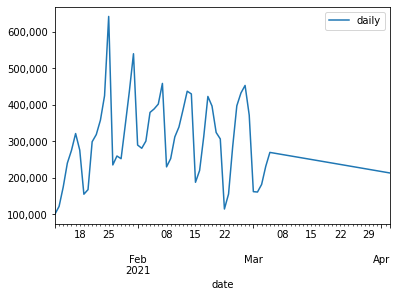

<Figure size 432x288 with 0 Axes>

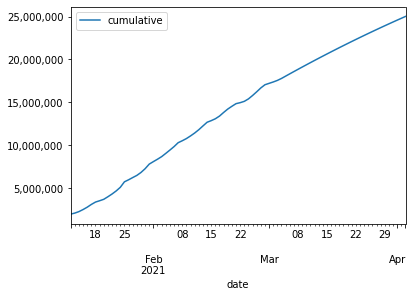

In [8]:
fig = plt.figure()
ax = complete.drop('cumulative', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

fig = plt.figure()
ax = complete.drop('daily', axis=1).plot()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig.show()

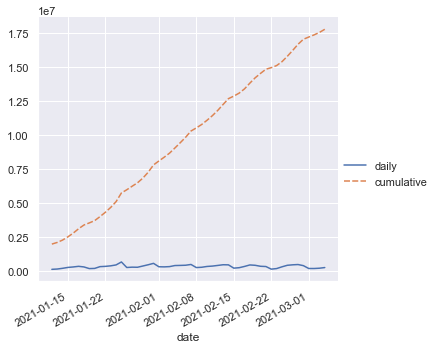

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")
g = sns.relplot(kind="line", data=dataframe)
g.fig.autofmt_xdate()
